### Implementing Term Frequency - Inverse Document Frequency (TF-IDF) with Multinomial Naive Bayes, Random Forest, and Logistic Regression

### Exploring the Dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
input_file = r'C:\Users\Ayush Rajpal\OneDrive\Desktop\USC\CSCI 567 Machine Learning\Project\New Datasets\Final Datasets (combined)\Essays Dataset.csv'
df = pd.read_csv(input_file)
df.head(10)

,text,label
0,Imagine being stuck in traffic again for the f...,1
1,Statistics show that when a community has give...,0
2,Since World War II we have been heavily depend...,0
3,"In your everyday life, just about anywhere you...",0
4,There are many ways of limiting car usage. Som...,1
5,How does the Electoral College affect the sele...,1
6,"Car alarms, car horns, and engines are basical...",0
7,In the intense debate concerning the validity ...,1
8,"Cars have been around for ages now, people are...",1
9,Many Americans today use cars to commute from ...,1


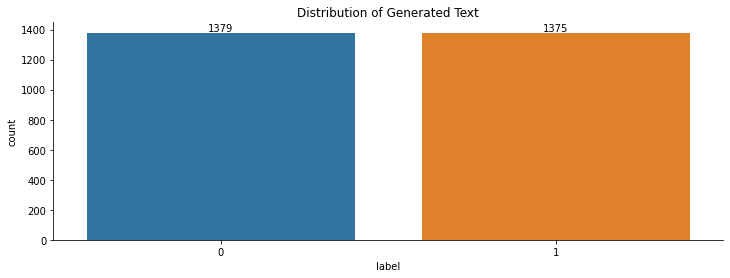

In [3]:
f, ax = plt.subplots(figsize=(12, 4))

sns.despine()

ax = sns.countplot(data=df, x="label")

abs_values = df['label'].value_counts().values

ax.bar_label(container=ax.containers[0], labels=abs_values)

ax.set_title("Distribution of Generated Text")

plt.show()

In [4]:
# Shuffling the data
shuffled_data = df.sample(frac=1, random_state=21)

In [5]:
shuffled_data.head()

,text,label
2540,"Dear, or. President I need to get something of...",1
622,Cars. Cars have been around since they became ...,1
1367,The electoral college is a time worn system. S...,0
1237,The Electoral College is America's current met...,0
1613,"In my opinion, I think that the Electoral Coll...",1


### Implementation of TF-IDF

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Ayush
[nltk_data]     Rajpal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
# TF-IDF Vectorization
vectorizer = TfidfVectorizer()
# Converting text to numerical form
X = vectorizer.fit_transform(shuffled_data["text"])
Y = shuffled_data["label"]

In [8]:
# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.25,
                                                    random_state=10)

In [9]:
np.size(y_train)

2065

In [10]:
counts = np.bincount(y_test)
number_of_zeros = counts[0]
number_of_ones = counts[1]

print(f"Number of 0s: {number_of_zeros}")
print(f"Number of 1s: {number_of_ones}")

Number of 0s: 331
Number of 1s: 358


### Multinomial NaiveBayes Classifier

In [11]:
from sklearn.naive_bayes import MultinomialNB

classifier_NB = MultinomialNB()
classifier_NB.fit(X_train, y_train)

MultinomialNB()

In [12]:
# Model Evaluation
y_pred = classifier_NB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100 

In [13]:
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 97.24%
Precision: 99.42%
Recall: 95.25%
F1 Score: 97.29%


Text(0.5, 1.0, 'Test')

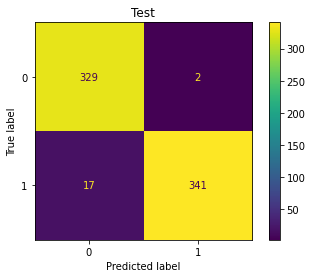

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Assuming y_test and y_pred are your true labels and predictions respectively
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Optionally, you can add a title
disp.ax_.set_title("Test")


### Random Forest Classifier

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [16]:
# Model Evaluation
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 94.05%
Precision: 96.21%
Recall: 92.18%
F1 Score: 94.15%


Text(0.5, 1.0, 'Test')

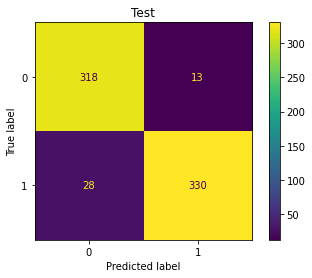

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Assuming y_test and y_pred are your true labels and predictions respectively
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Optionally, you can add a title
disp.ax_.set_title("Test")


In [18]:
# Changing the number of tree and the criterion

classifier_gini = RandomForestClassifier(n_estimators = 100, criterion = 'gini', random_state = 42)
classifier_gini.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
y_pred = classifier_gini.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100 

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 98.55%
Precision: 98.07%
Recall: 99.16%
F1 Score: 98.61%


Text(0.5, 1.0, 'Test')

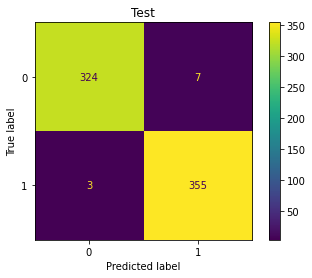

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Assuming y_test and y_pred are your true labels and predictions respectively
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Optionally, you can add a title
disp.ax_.set_title("Test")


### Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression

classifier_LR = LogisticRegression(random_state=42)
classifier_LR.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [22]:
y_pred = classifier_LR.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100 

print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

Accuracy: 97.97%
Precision: 98.31%
Recall: 97.77%
F1 Score: 98.04%


Text(0.5, 1.0, 'Test')

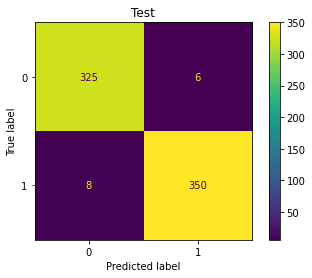

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Assuming y_test and y_pred are your true labels and predictions respectively
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Optionally, you can add a title
disp.ax_.set_title("Test")
